# Histogram 1D
## This histogram class allows efficient building of histograms, plotting and saving

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import h5py
from geobipy import hdfRead
from geobipy import StatArray
from geobipy import Histogram1D
import numpy as np
import matplotlib.pyplot as plt

## First, generate some random data and the bins

In [2]:
x=np.random.randn(1000)
bins = StatArray(np.linspace(-4,4,101), 'tests')

## Set the histogram using the bins, and update

In [3]:
H=Histogram1D(bins = bins)
H.update(x)

## Plot the histogram

<IPython.core.display.Javascript object>


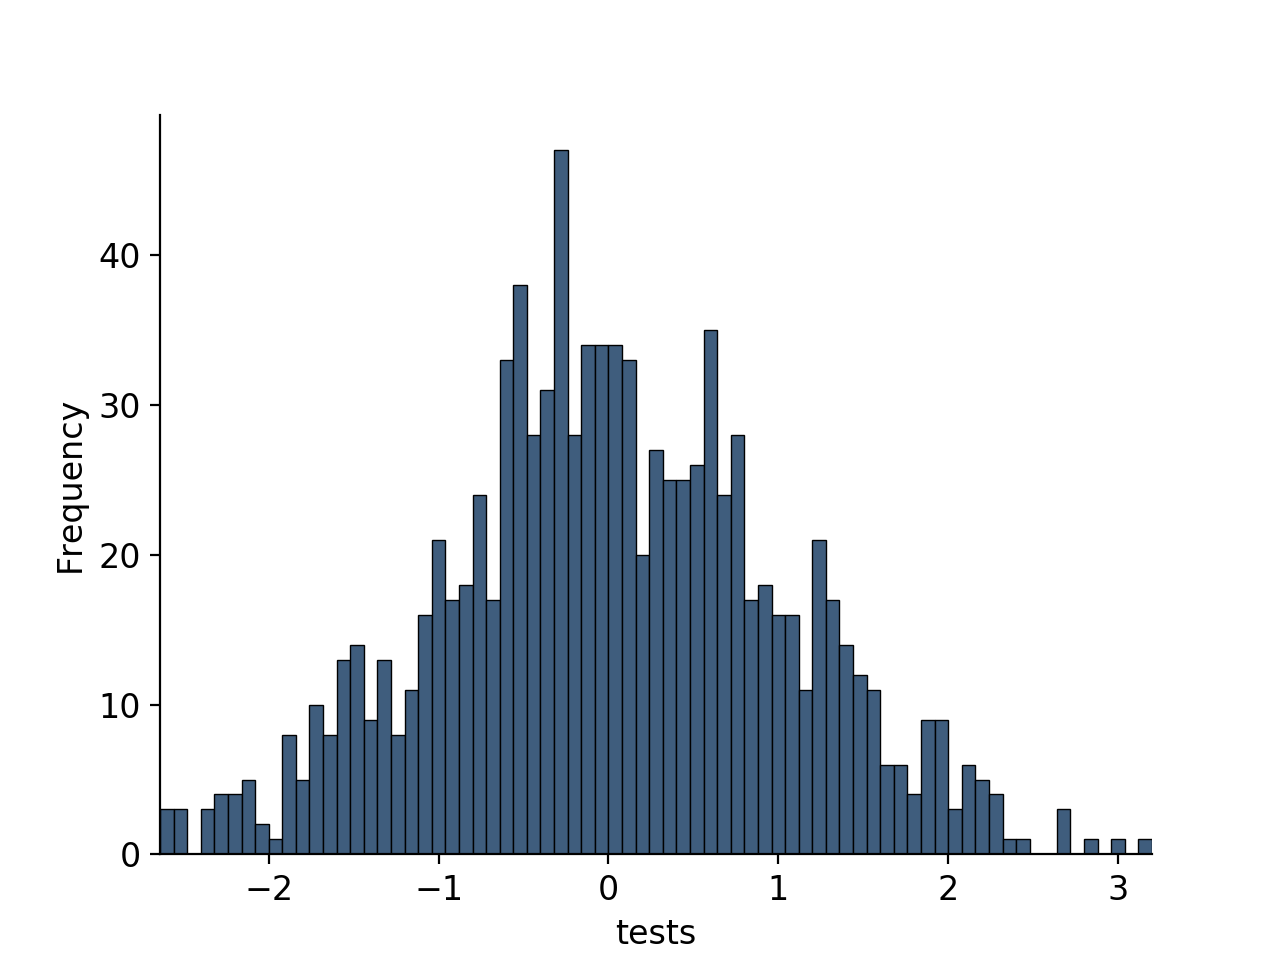

In [4]:
plt.figure()
H.plot()

In [5]:
x = np.full(100, 1000.0)
H.update(x, clip=True)

<IPython.core.display.Javascript object>


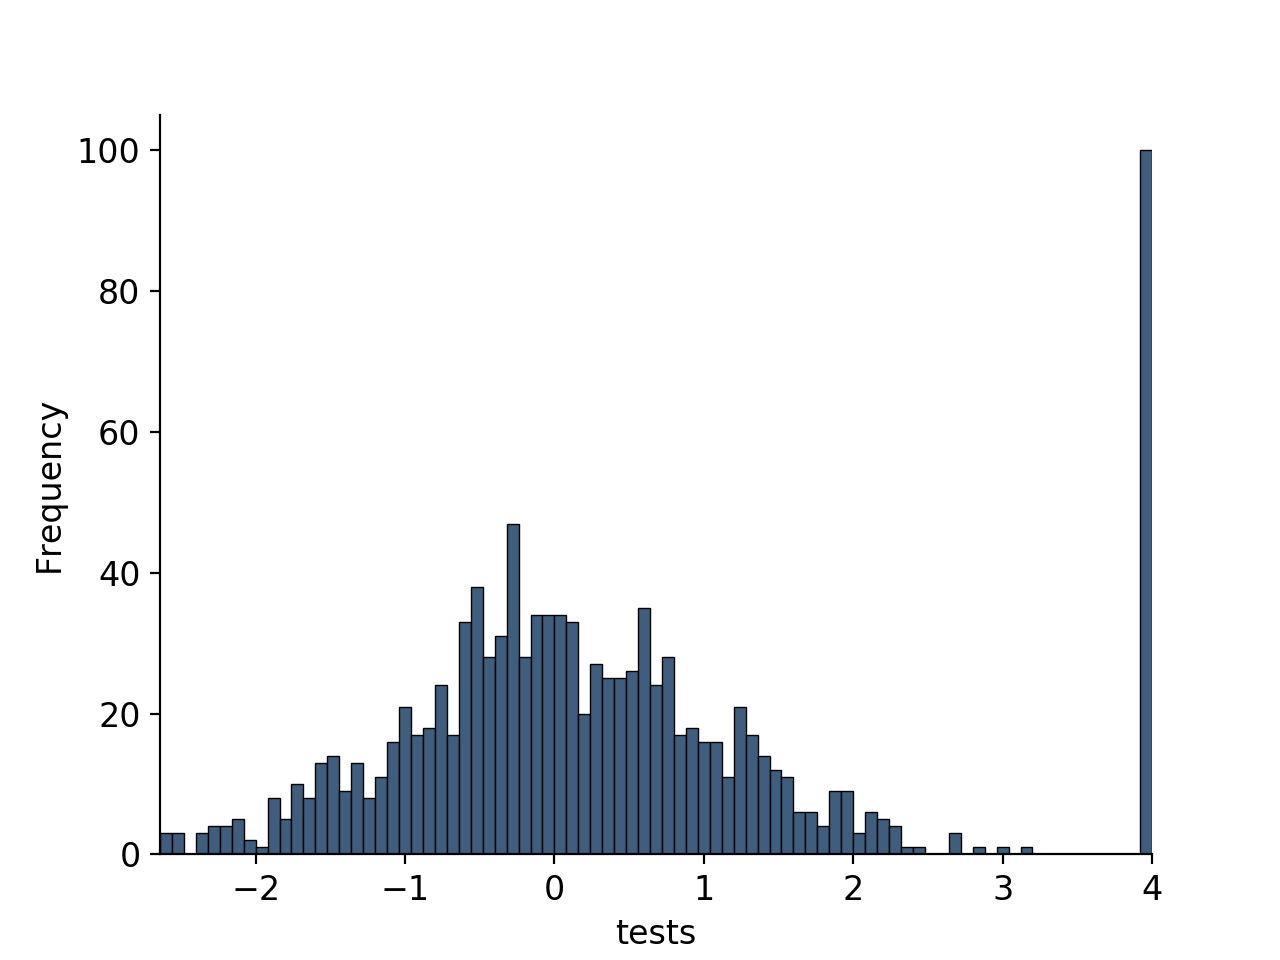

In [6]:
plt.figure()
H.plot()

## We can write/read the histogram to/from a HDF file

In [7]:
with h5py.File('Histogram.h5','w') as hf:
    H.toHdf(hf,'Histogram')

In [8]:
H1=hdfRead.readKeyFromFiles('Histogram.h5','/','Histogram')

<IPython.core.display.Javascript object>


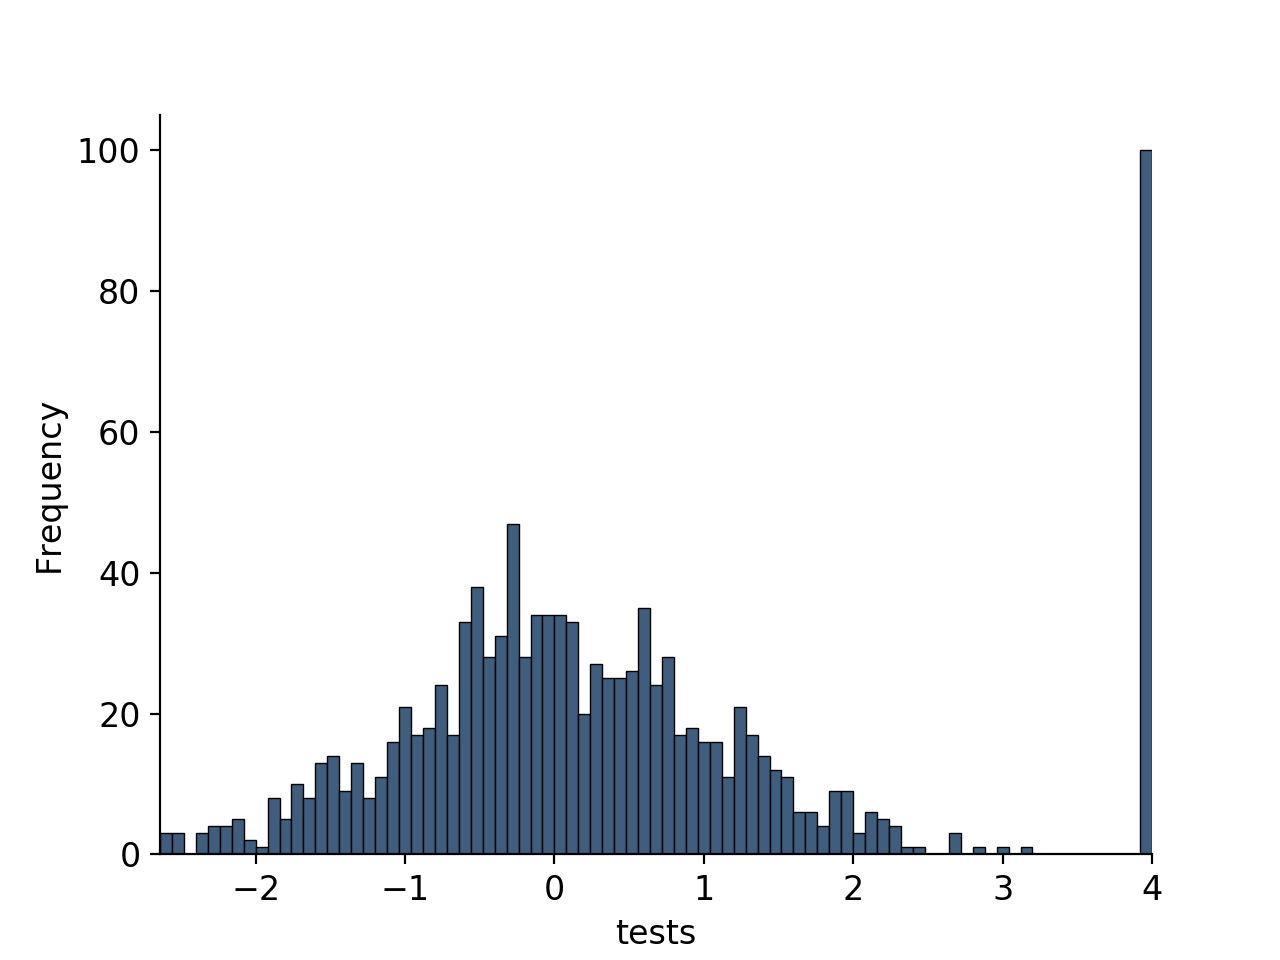

In [9]:
plt.figure()
H1.plot()

### Using a histogram with irregular bins

In [10]:
edges = StatArray(np.cumsum(np.arange(0.0, 10.0)), 'tests')
edges

StatArray([ 0.,  1.,  3.,  6., 10., 15., 21., 28., 36., 45.])

In [11]:
H = Histogram1D(bins=edges)

In [12]:
H.binCentres

StatArray([ 0.5,  2. ,  4.5,  8. , 12.5, 18. , 24.5, 32. , 40.5])

In [13]:
H.bins

StatArray([ 0.,  1.,  3.,  6., 10., 15., 21., 28., 36., 45.])

In [14]:
addThese = np.random.randint(50.0, size=10000)

In [15]:
H.update(addThese, clip=False)

<IPython.core.display.Javascript object>


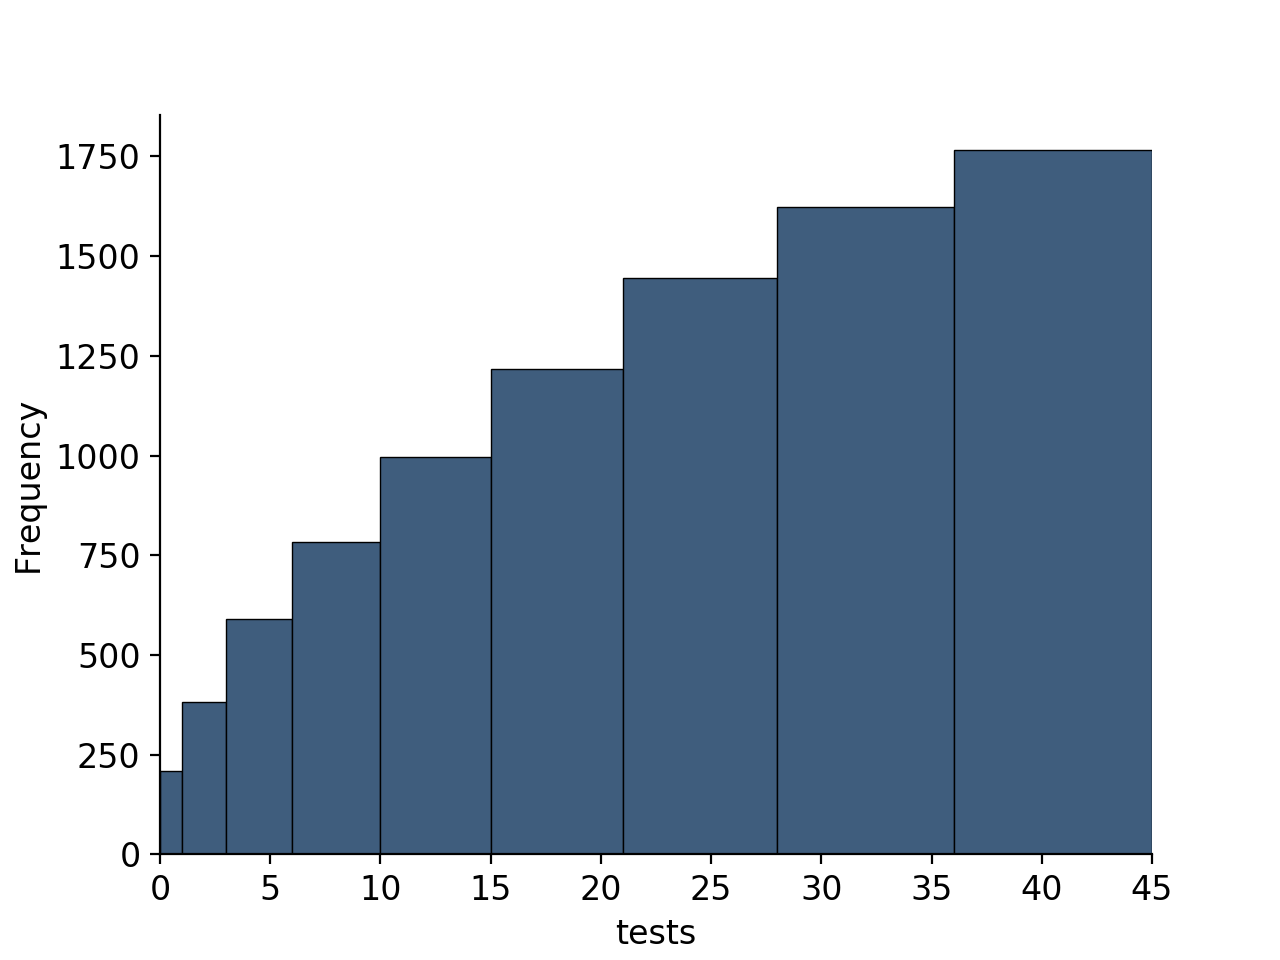

In [16]:
plt.figure()
H.plot()

<IPython.core.display.Javascript object>


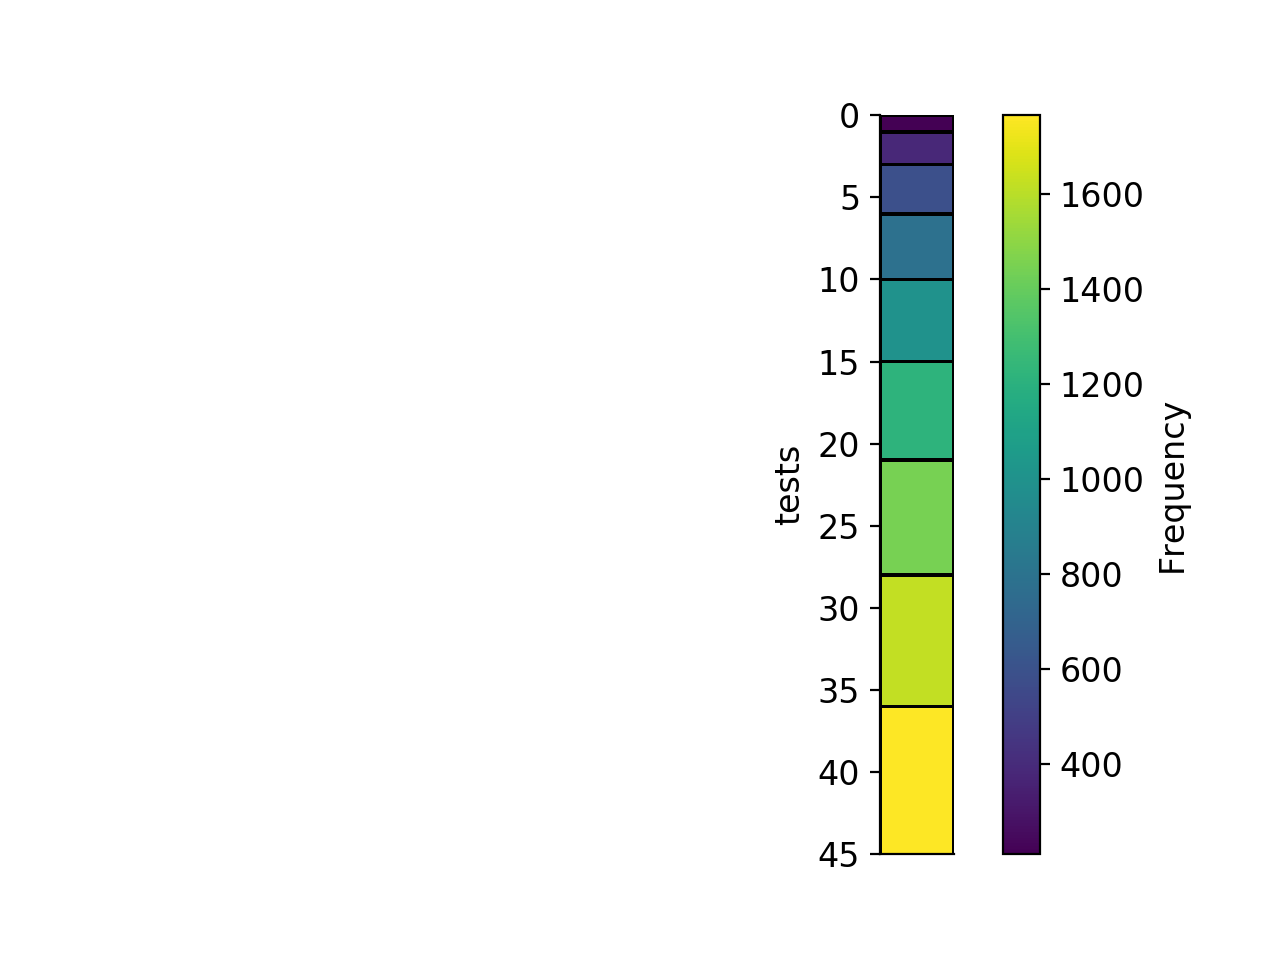

In [17]:
plt.figure()
H.pcolor(grid=True)